# Pymaceuticals Inc.

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file1 = "clinicaltrial_data.csv"
file2 = "mouse_drug_data.csv"

clinical_trial_data = pd.read_csv(file1)

In [181]:
mouse_drug_data = pd.read_csv(file2) 
# Start with 250 mice. 10 drugs. Give each drug to 25 mice. 
# 10 different drugs x 25 mice per drug = 250 rows in mouse_drug_data. 

__Merge Datasets__

In [242]:
merged_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID")

## Tumor Volume Changes

In [183]:
# Sort by mouse id and timepoint
sorted_data = merged_data.sort_values(by=['Mouse ID', 'Timepoint'])

In [235]:
# Calculate tumor change across timepoints. Store in tumor_changes list.

prior_mouse = ""
tumor_changes = []
tumor_percent_changes = []

for index, row in sorted_data.iterrows():
    if row[0] != prior_mouse:
        initial_tumor_volume = row[2]
        prior_tumor_volume = initial_tumor_volume
    
    tumor_increase_decrease = row[2] - prior_tumor_volume
    tumor_changes.append(tumor_increase_decrease)
    tumor_percent_changes.append(tumor_increase_decrease / initial_tumor_volume)
    
    prior_mouse = row[0]
    prior_tumor_volume = row[2]    

In [243]:
# Add column to dataframe
merged_data['Tumor Change'] = tumor_changes
merged_data['Tumor Change Percent'] = tumor_percent_changes
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug,Tumor Change,Tumor Change Percent
0,b128,0,45.000000,0,Capomulin,0.000000,0.000000
1,b128,5,45.651331,0,Capomulin,3.508468,0.077966
2,b128,10,43.270852,0,Capomulin,3.343969,0.074310
3,b128,15,43.784893,0,Capomulin,0.925433,0.020565
4,b128,20,42.731552,0,Capomulin,2.395466,0.053233


#### Capomulin

In [223]:
Drug1_TumorChange = merged_data[(merged_data['Drug'] == 'Capomulin')]

In [224]:
data_ordered_by_Timepoint = Drug1_TumorChange.sort_values(by=['Timepoint'])
x_axis = list(Drug1_TumorChange['Timepoint'])
y_axis = list(Drug1_TumorChange['Tumor Change'])

Text(0.5,0,'Treatment Day')

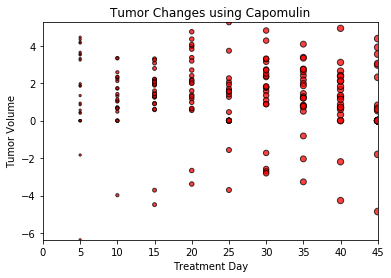

In [225]:
x_limit = 45

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

minimum_y_value = min(y_axis)
maximum_y_value = max(y_axis)

# Add 10 to top and bottom, so y value is not on x_axis.
plt.ylim(minimum_y_value, maximum_y_value)
plt.xlim(0, x_limit)

plt.title("Tumor Changes using Capomulin")
plt.ylabel("Tumor Volume")
plt.xlabel("Treatment Day")

#### Infubinol

In [226]:
Drug2_TumorChange = merged_data[(merged_data['Drug'] == 'Infubinol')]

In [227]:
data_ordered_by_Timepoint = Drug2_TumorChange.sort_values(by=['Timepoint'])
x_axis = list(Drug2_TumorChange['Timepoint'])
y_axis = list(Drug2_TumorChange['Tumor Change'])

Text(0.5,0,'Treatment Day')

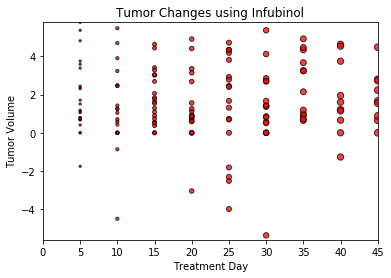

In [228]:
x_limit = 45

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

minimum_y_value = min(y_axis)
maximum_y_value = max(y_axis)

# Add 10 to top and bottom, so y value is not on x_axis.
plt.ylim(minimum_y_value, maximum_y_value)
plt.xlim(0, x_limit)

plt.title("Tumor Changes using Infubinol")
plt.ylabel("Tumor Volume")
plt.xlabel("Treatment Day")

#### Ketapril

In [229]:
Drug3_TumorChange = merged_data[(merged_data['Drug'] == 'Ketapril')]

In [230]:
data_ordered_by_Timepoint = Drug3_TumorChange.sort_values(by=['Timepoint'])
x_axis = list(Drug3_TumorChange['Timepoint'])
y_axis = list(Drug3_TumorChange['Tumor Change'])

Text(0.5,0,'Treatment Day')

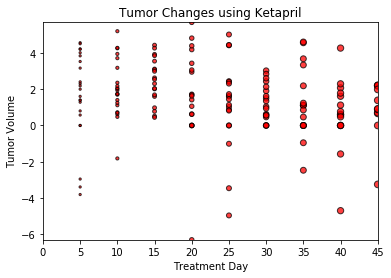

In [231]:
x_limit = 45

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

minimum_y_value = min(y_axis)
maximum_y_value = max(y_axis)

# Add 10 to top and bottom, so y value is not on x_axis.
plt.ylim(minimum_y_value, maximum_y_value)
plt.xlim(0, x_limit)

plt.title("Tumor Changes using Ketapril")
plt.ylabel("Tumor Volume")
plt.xlabel("Treatment Day")

#### Placebo

In [232]:
Drug4_TumorChange = merged_data[(merged_data['Drug'] == 'Placebo')]

In [233]:
data_ordered_by_Timepoint = Drug4_TumorChange.sort_values(by=['Timepoint'])
x_axis = list(Drug4_TumorChange['Timepoint'])
y_axis = list(Drug4_TumorChange['Tumor Change'])

Text(0.5,0,'Treatment Day')

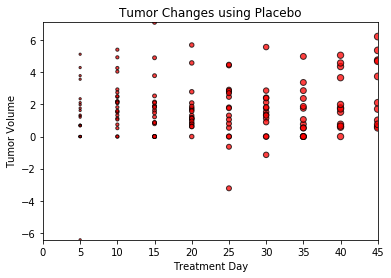

In [234]:
x_limit = 45

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

minimum_y_value = min(y_axis)
maximum_y_value = max(y_axis)

# Add 10 to top and bottom, so y value is not on x_axis.
plt.ylim(minimum_y_value, maximum_y_value)
plt.xlim(0, x_limit)

plt.title("Tumor Changes using Placebo")
plt.ylabel("Tumor Volume")
plt.xlabel("Treatment Day")

In [216]:
# Filter for 4 drugs to analyze.
filtered_4_drugs = merged_data[(merged_data['Drug'] == 'Capomulin') |
                               (merged_data['Drug']== 'Infubinol') | 
                               (merged_data['Drug']== 'Ketapril') | 
                               (merged_data['Drug']== 'Placebo')]


## Survival Rate

In [168]:
# Count of each Timepoint value indicates the number of mice that had a treatment at that timepoint (that day).
# If they didn't have a treatment at that timepoint, they died prior to that treatment.
num_alive = filtered_4_drugs.Timepoint.value_counts().values

x_limit = 45
x_axis = np.arange(0, x_limit + 5, 5)

survival_df = pd.DataFrame ({
    "Treatment Day": x_axis,
    "# Mice Alive": num_alive
})
survival_df = survival_df.set_index("Treatment Day")
survival_df

,# Mice Alive
Treatment Day,
0,100
5,97
10,92
15,84
20,81
25,76
30,72
35,65
40,58


Text(0.5,0,'Treatment Day')

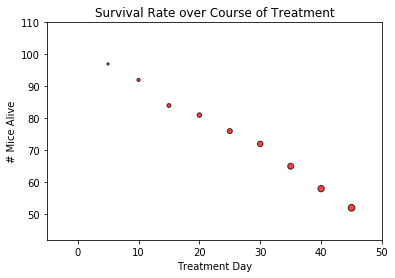

In [169]:
plt.scatter(x_axis, num_alive, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

minimum_y_value = filtered_4_drugs.Timepoint.value_counts().min() 
maximum_y_value = filtered_4_drugs.Timepoint.value_counts().max() 

# Add 10 to top and bottom, so y value is not on x_axis.
plt.ylim(minimum_y_value - 10, maximum_y_value + 10)
plt.xlim(0 - 5, x_limit + 5)

plt.title("Survival Rate over Course of Treatment")
plt.ylabel("# Mice Alive")
plt.xlabel("Treatment Day")

# NOT SHOWING VALUE AT DAY 0


In [170]:
# ISSUES:
#    Survival Rate scatter plot - NOT SHOWING VALUE AT DAY 0
#    len(clinical_trial_data) = 1893
#    len(merged_data) = 1906
#    len(mouse_drug_data) = 250

### Total % Tumor Volume Change

In [244]:
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug,Tumor Change,Tumor Change Percent
0,b128,0,45.000000,0,Capomulin,0.000000,0.000000
1,b128,5,45.651331,0,Capomulin,3.508468,0.077966
2,b128,10,43.270852,0,Capomulin,3.343969,0.074310
3,b128,15,43.784893,0,Capomulin,0.925433,0.020565
4,b128,20,42.731552,0,Capomulin,2.395466,0.053233


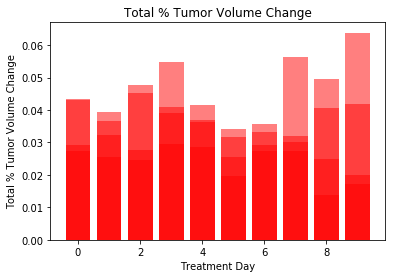

In [256]:
x_axis = np.arange(10)

Drug1_Filter = merged_data.loc[merged_data.Drug == 'Capomulin']
y_axis = Drug1_Filter.groupby('Timepoint')['Tumor Change Percent'].mean()
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

Drug2_Filter = merged_data.loc[merged_data.Drug == 'Infubinol']
y_axis = Drug2_Filter.groupby('Timepoint')['Tumor Change Percent'].mean()
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

Drug3_Filter = merged_data.loc[merged_data.Drug == 'Ketapril']
y_axis = Drug3_Filter.groupby('Timepoint')['Tumor Change Percent'].mean()
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

Drug4_Filter = merged_data.loc[merged_data.Drug == 'Placebo']
y_axis = Drug4_Filter.groupby('Timepoint')['Tumor Change Percent'].mean()
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

plt.title("Total % Tumor Volume Change")
plt.xlabel("Treatment Day")
plt.ylabel("Total % Tumor Volume Change")
plt.show()